In [1]:
import numpy as np
import cv2
output = np.load('./outheatmap.npz')
output['heatmaps'].shape

(101, 64, 64)

In [44]:
from torch.nn.functional import mse_loss, softmax
import torch
heatmaps = torch.tensor(output['heatmaps'])

In [45]:
# def softmax(values):
#     return torch.exp(values) / torch.sum(torch.exp(values))

def minmax(values):
    return (values -values.min()) / (values.max() - values.min())

In [46]:
heatmaps[0, ...].flatten().shape

torch.Size([4096])

In [88]:
from scipy.stats import wasserstein_distance
metric = mse_loss
metric = wasserstein_distance
transform = softmax
# transform = minmax

In [89]:
changes = np.zeros(len(output['heatmaps'])-1)
changes_original = np.zeros(len(output['heatmaps'])-1)
angles = output['angles']
with torch.no_grad():
    for i in range(len(output['heatmaps'])-1): 
        adj_change = metric(
            transform(heatmaps[i+1, ...].flatten(), dim=0), 
            transform(heatmaps[i, ...].flatten(), dim=0))
        changes[i] = adj_change
        changes_original[i] = metric(transform(heatmaps[i+1, ...].flatten(), dim=0), 
                                       transform(heatmaps[0, ...].flatten(), dim=0))

<Axes: >

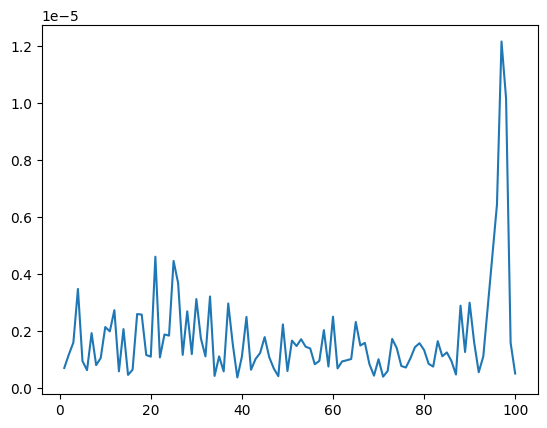

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x=angles[1:], y=changes)

Text(0, 0.5, 'L2')

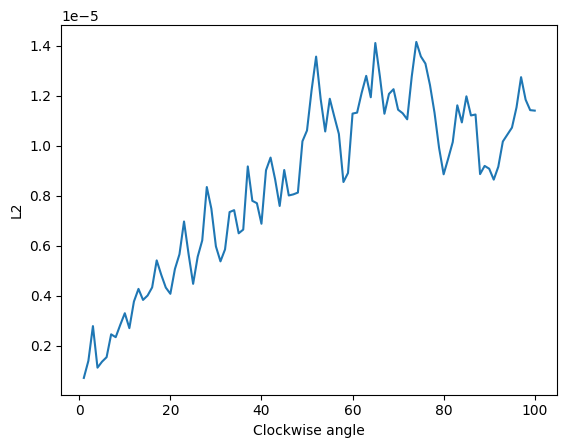

In [91]:
sns.lineplot(x=angles[1:], y=changes_original)
plt.xlabel("Clockwise angle")
plt.ylabel("L2")

In [86]:
from scipy.stats import kendalltau
res_kendall = kendalltau(angles[1:][~np.isnan(changes_original)], changes_original[~np.isnan(changes_original)])
res_kendall.pvalue

4.661462644901786e-11

In [87]:
res_kendall.statistic

0.44877344877344877